In [611]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as tm

# directly using tree was not working so had to import thr sklearner separately 
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Read the Data

In [71]:
cd ~/


/Users/ssandesh


In [612]:
#dataset = pd.read_csv('ML_Gatech/Project1/datasets/bank.csv', sep=';')
dataset1 = pd.read_excel('ML_Gatech/Project1/datasets/Raisin_Dataset.xlsx')

In [613]:
dataset1 = shuffle(dataset1) 
dataset1.dropna(inplace=True)
X  = dataset1.iloc[:, :-1]
Y =  dataset1.iloc[:, -1]
dataset1.head


<bound method NDFrame.head of        Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
469  195383       755.012914       335.790452      0.895656      204472   
346   46397       310.724369       192.903837      0.783953       48183   
108   82826       396.705912       269.762855      0.733205       84981   
238   41593       310.674892       178.323287      0.818865       44753   
811   85894       477.171993       231.039681      0.874965       89369   
..      ...              ...              ...           ...         ...   
384   76222       388.807399       250.696074      0.764366       77958   
863   67468       424.563654       207.823052      0.872004       70674   
854   73294       445.246120       217.620241      0.872416       76157   
361   49039       285.402087       220.819901      0.633534       50879   
629   83059       440.559971       243.636512      0.833171       88806   

       Extent  Perimeter    Class  
469  0.728769   1893.414    Besni

In [614]:
dataset1['Class'].value_counts()

Besni      450
Kecimen    450
Name: Class, dtype: int64

In [615]:
dataset1.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000


In [651]:
fit_time = np.zeros(5) # one for each algorithm 
algotrithms = np.array(['Decision Tree','KNN', 'Ada Boosting', 'SVM', 'Neural Network'])
accuracy_before = np.zeros(5)
accuracy_after = np.zeros(5)
inference_time = np.zeros(5)

## Section 1 : Decion Tree 


In [617]:
# Validation Curves

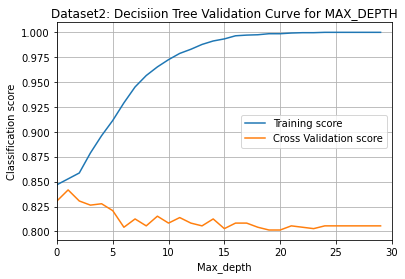

In [618]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=10)
clf_dt = DecisionTreeClassifier( random_state=7, splitter='best', criterion='entropy')
clf_dt = clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
accuracy_before[0] = metrics.accuracy_score(y_test, y_pred)*100
cv = StratifiedKFold(n_splits=5)
train_scores, test_scores = validation_curve(clf_dt, X_train, y_train, param_name="max_depth", 
                                             param_range=np.arange(30) + 1, cv=cv, n_jobs=-1)

plt.figure()
plt.plot(np.mean(train_scores, axis=1), label='Training score')
plt.plot(np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset2: Decisiion Tree Validation Curve for MAX_DEPTH')
plt.xlabel('Max_depth')
plt.ylabel("Classification score")
plt.xlim([0,30])
plt.legend(loc="best")
plt.grid()
plt.show()

In [619]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#print(ccp_alphas)
#print(impurities)

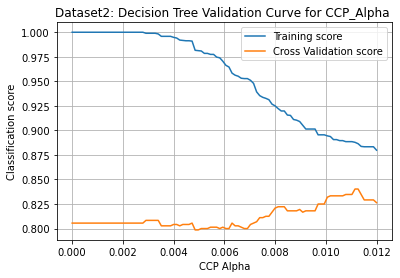

In [620]:
cv = StratifiedKFold(n_splits=5)
train_scores, test_scores = validation_curve(clf_dt, X_train, y_train, param_name="ccp_alpha", 
                                             param_range=np.linspace(0,0.012,100), cv=cv, n_jobs=-1)

plt.figure()
plt.plot(np.linspace(0,0.012,100), np.mean(train_scores, axis=1), label='Training score')
plt.plot(np.linspace(0,0.012,100),np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset2: Decision Tree Validation Curve for CCP_Alpha ')
plt.xlabel('CCP Alpha')
plt.ylabel("Classification score")
#plt.xlim([0,30])
plt.legend(loc="best")
plt.grid()
plt.show()

<AxesSubplot:>

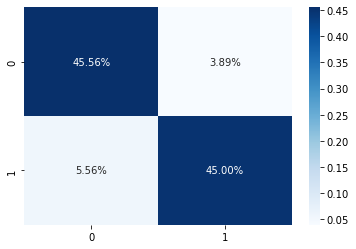

In [621]:
max_depth_best = 4
ccp_alpha_best = 0.0066
clf_dt_best = DecisionTreeClassifier( random_state=7,max_depth=max_depth_best, ccp_alpha=ccp_alpha_best)
t_before = tm.time()
clf_dt_best = clf_dt_best.fit(X_train,y_train)
t_after = tm.time()
fit_time[0]=t_after-t_before
t_before = tm.time()
y_pred = clf_dt_best.predict(X_test)
t_after = tm.time()
inference_time[0] = t_after-t_before
accuracy_after[0] = metrics.accuracy_score(y_test, y_pred)*100


cm=confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [622]:
# Learning Curve Decision Tree 

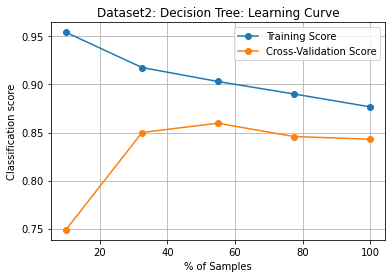

In [623]:
cv = StratifiedKFold(n_splits=5)
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes,train_scores, test_scores = learning_curve(clf_dt_best, X_train,
                                           y_train,cv=cv,n_jobs=-1,train_sizes=train_sizes)
train_sizes=(train_sizes/train_sizes[-1])*100
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.grid()
plt.title('Dataset2: Decision Tree: Learning Curve')
plt.xlabel('% of Samples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.show()

## SECTION 2: KNN

In [624]:
clf_knn = KNeighborsClassifier(n_neighbors=5, )
clf_knn = clf_knn.fit(X_train,y_train)
y_pred = clf_knn.predict(X_test)
accuracy_before[1] = metrics.accuracy_score(y_test, y_pred)*100

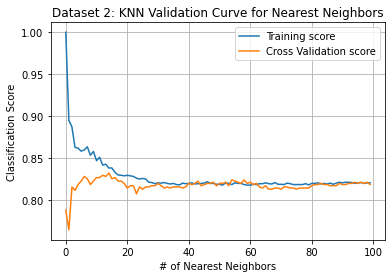

In [625]:
# tuning the hyperparameter
cv = StratifiedKFold(n_splits=5)
train_scores, test_scores = validation_curve(clf_knn, X_train, y_train, param_name="n_neighbors", 
                                             param_range=np.arange(100) + 1, cv=cv, n_jobs=-1)

plt.figure()
plt.plot(np.mean(train_scores, axis=1), label='Training score')
plt.plot(np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset 2: KNN Validation Curve for Nearest Neighbors')
plt.xlabel('# of Nearest Neighbors')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.show()

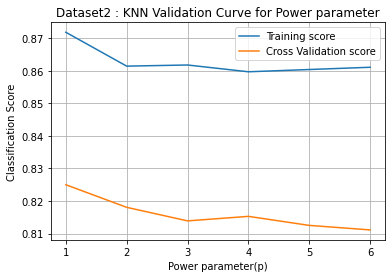

In [626]:
cv = StratifiedKFold(n_splits=5)
# second hyperparameter weights
param_name= 'weights'
param_range=['uniform', 'distance']
# this is did not help
# let's look at another
# https://www.datavedas.com/knn-distance-metrics/
param_name = 'p'
param_range = np.arange(7)
train_scores, test_scores = validation_curve(clf_knn, X_train, y_train, param_name=param_name, 
                                             param_range=param_range, cv=cv, n_jobs=-1)

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset2 : KNN Validation Curve for Power parameter')
plt.xlabel('Power parameter(p)')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.show()

<AxesSubplot:>

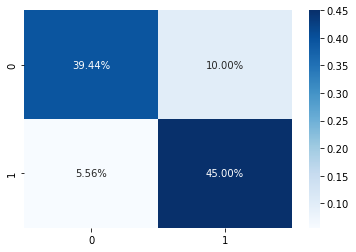

In [652]:
best_K=36
best_p=3
best_weight='distance'
clf_knn_best = KNeighborsClassifier(n_neighbors=best_K, weights=best_weight,p=best_p )
t_before = tm.time()
clf_knn_best = clf_knn_best.fit(X_train,y_train)
t_after = tm.time()
fit_time[1] = t_after-t_before
t_before = tm.time()
y_pred = clf_knn_best.predict(X_test)
t_after = tm.time()
inference_time[1] = t_after-t_before
accuracy_after[1] = metrics.accuracy_score(y_test, y_pred)*100
cm=confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [628]:
# Learning Curve 

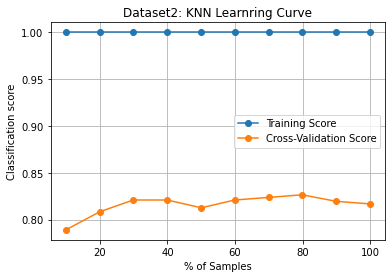

In [629]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes,train_scores, test_scores = learning_curve(clf_knn_best, X_train,
                                           y_train,cv=cv,n_jobs=-1,train_sizes=train_sizes)
train_sizes=(train_sizes/train_sizes[-1])*100
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.grid()
plt.title('Dataset2: KNN Learnring Curve')
plt.xlabel('% of Samples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.show()

## Section 3: ADA Boosting 

In [630]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada_boost = AdaBoostClassifier(n_estimators=5, random_state=7)
clf_ada_boost = clf_ada_boost.fit(X_train,y_train)
y_pred = clf_ada_boost.predict(X_test)
accuracy_before[2] = metrics.accuracy_score(y_test, y_pred)*100

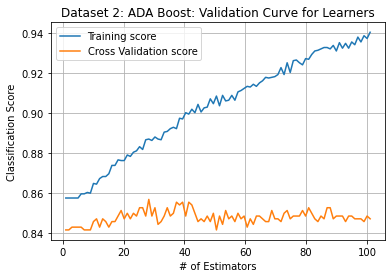

In [631]:
# Validation curve while modifying the number of weak learners
cv = StratifiedKFold(n_splits=5)
train_scores, test_scores = validation_curve(clf_ada_boost, X_train, y_train, param_name="n_estimators", 
                                             param_range=np.arange(100) + 1, cv=cv, n_jobs=-1)

plt.figure()
plt.plot(np.linspace(1, 101, 100), np.mean(train_scores, axis=1), label='Training score')
plt.plot(np.linspace(1, 101, 100), np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset 2: ADA Boost: Validation Curve for Learners')
plt.xlabel('# of Estimators')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.show()


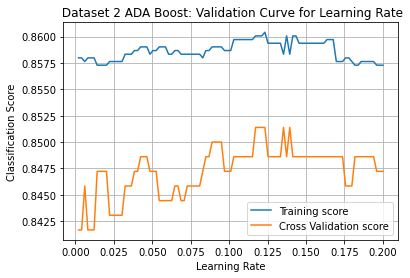

In [632]:
learning_rate_range=np.linspace(0,0.2,100)
train_scores, test_scores = validation_curve(clf_ada_boost, X_train, y_train, param_name="learning_rate", 
                                             param_range=learning_rate_range, cv=cv, n_jobs=-1)

plt.figure()
plt.plot( learning_rate_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot( learning_rate_range, np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title(' Dataset 2 ADA Boost: Validation Curve for Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [653]:
best_weak_learners=8
best_learner_rate=0.046
clf_boosting_best = AdaBoostClassifier(n_estimators=best_weak_learners,learning_rate=best_learner_rate,random_state=7)
t_before = tm.time()
clf_boosting_best = clf_boosting_best.fit(X_train,y_train)
t_after = tm.time()
fit_time[2] = t_after-t_before
t_before = tm.time()
y_pred = clf_boosting_best.predict(X_test)
t_after = tm.time()
inference_time[2] = t_after-t_before
accuracy_after[2] = metrics.accuracy_score(y_test, y_pred)*100

In [634]:
# Learning Curve

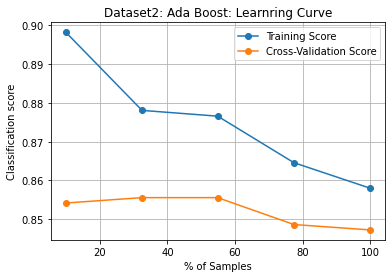

In [635]:
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes,train_scores, test_scores = learning_curve(clf_boosting_best, X_train,
                                           y_train,cv=cv,n_jobs=-1,train_sizes=train_sizes)
train_sizes=(train_sizes/train_sizes[-1])*100
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.grid()
plt.title('Dataset2: Ada Boost: Learnring Curve')
plt.xlabel('% of Samples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.show()

## Section 4:  SVM

In [636]:
from sklearn.svm import SVC
clf_svm = SVC(kernel='poly', random_state=7)
clf_svm = clf_svm.fit(X_train,y_train)
y_pred = clf_svm.predict(X_test)
accuracy_before[3] = metrics.accuracy_score(y_test, y_pred)*100

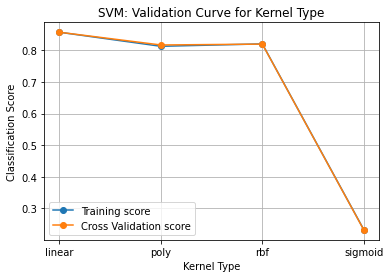

In [637]:
kernel_type=['linear', 'poly', 'rbf', 'sigmoid']
clf_svm = SVC(kernel='linear', random_state=7)
train_scores, test_scores = validation_curve(clf_svm, X_train, y_train, param_name="kernel", 
                                             param_range=kernel_type, cv=cv, n_jobs=-1)

plt.figure()
plt.plot(kernel_type,np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(kernel_type, np.mean(test_scores, axis=1), 'o-', label='Cross Validation score')
plt.title('SVM: Validation Curve for Kernel Type')
plt.xlabel('Kernel Type')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.show()


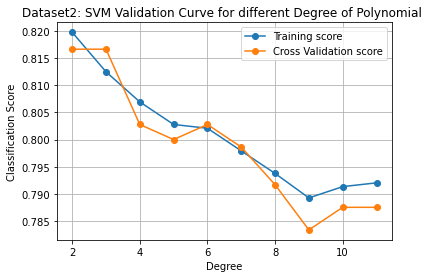

In [638]:
#ensuring if any higher degree polynomials perform better 
degree=[2,3,4,5,6,7,8,9,10,11]
clf_svm_test_poly = SVC(kernel='poly', random_state=7)
train_scores, test_scores = validation_curve(clf_svm_test_poly, X_train, y_train, param_name="degree", 
                                             param_range=degree, cv=cv, n_jobs=-1)

plt.figure()
plt.plot(degree,np.mean(train_scores, axis=1),'o-', label='Training score')
plt.plot(degree, np.mean(test_scores, axis=1),'o-', label='Cross Validation score')
plt.title('Dataset2: SVM Validation Curve for different Degree of Polynomial ')
plt.xlabel('Degree')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.show()

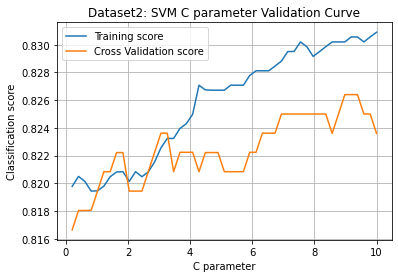

In [639]:
#C_range = np.logspace(-4, 0, 50)
C_range = np.linspace(0, 10, 50)
clf_svm = SVC(kernel='rbf', random_state=7)
train_scores, test_scores = validation_curve(clf_svm, X_train, y_train, param_name="C", 
                                             param_range=C_range, cv=cv, n_jobs=-1)

plt.figure()
train_scores.round(4)
test_scores.round(4)
plt.plot(C_range, np.mean(train_scores.round(4), axis=1), label='Training score')
plt.plot( C_range, np.mean(test_scores.round(4), axis=1), label='Cross Validation score')
plt.title('Dataset2: SVM C parameter Validation Curve')
plt.xlabel('C parameter')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.ticklabel_format(useOffset=False)
plt.show()

In [654]:
best_kernel='linear'
C_best=2.41
clf_svm = SVC(kernel=best_kernel, C=C_best, random_state=7)
t_before = tm.time()
clf_svm = clf_svm.fit(X_train,y_train)
t_after = tm.time()
fit_time[3] = t_after - t_before
t_before = tm.time()
y_pred = clf_svm.predict(X_test)
t_after = tm.time()
inference_time[3] = t_after-t_before


In [641]:
best_kernel='linear'
C_best=2.41
clf_svm = SVC(kernel=best_kernel, C=C_best, random_state=7)
clf_svm = clf_svm.fit(X_train,y_train)
y_pred = clf_svm.predict(X_test)
accuracy_after[3] = metrics.accuracy_score(y_test, y_pred)*100

In [642]:
# Learning Curve

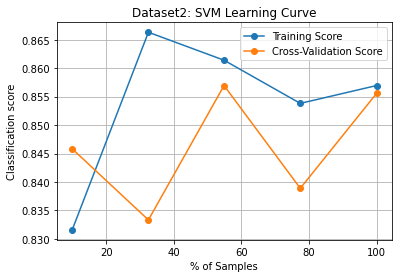

In [643]:
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes,train_scores, test_scores = learning_curve(classifier_svm_best, X_train,
                                           y_train,cv=cv,n_jobs=-1,train_sizes=train_sizes)
train_sizes=(train_sizes/train_sizes[-1])*100
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.grid()
plt.title('Dataset2: SVM Learning Curve')
plt.xlabel('% of Samples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.show()

## Section 5: Neural Network

In [644]:
# Building a Neural Network
# starting this section save the refrences 
# https://scikit-learn.org/stable/modules/
#   generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
# 
clf_NN = MLPClassifier(solver='adam', activation='relu',max_iter=300,
                    hidden_layer_sizes=(5,2), random_state=7)
clf_NN = clf_NN.fit(X_train,y_train)
y_pred = clf_NN.predict(X_test)
accuracy_before[4] = metrics.accuracy_score(y_test, y_pred)*100

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ssand

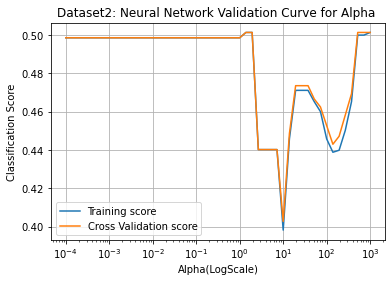

In [645]:
# Two hyperparameter to tune are the Learning Rate and hidden layers
cv = StratifiedKFold(n_splits=5)
alpha_val = np.logspace(-4, 3, 50)
train_scores, test_scores = validation_curve(clf_NN, X_train, y_train, param_name="alpha",
                                             param_range=alpha_val, cv=cv, n_jobs=-1)

plt.figure()
plt.semilogx(alpha_val, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(alpha_val, np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset2: Neural Network Validation Curve for Alpha ')
plt.xlabel('Alpha(LogScale)')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
#plt.ticklabel_format(useOffset=False)
plt.show()


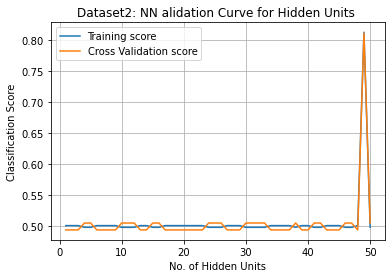

In [646]:
# find number of hidden unit
hidden_unit_size = 50
test_data = np.zeros(hidden_unit_size)
train_data = np.zeros(hidden_unit_size)
hidden_layers = list(range(1, hidden_unit_size+1)) 

for i in hidden_layers:
    clf_NN = MLPClassifier(solver='lbfgs', activation='relu',
                    hidden_layer_sizes=(i,2), random_state=7)
    clf_NN.fit(X_train,y_train)
    y_pred = clf_NN.predict(X_test)
    y_pred_train = clf_NN.predict(X_train)
    test_data[i-1] = metrics.accuracy_score(y_test, y_pred)
    train_data[i-1] = metrics.accuracy_score(y_train, y_pred_train)

plt.figure()
plt.plot(hidden_layers,train_data , label='Training score')
plt.plot(hidden_layers,test_data , label='Cross Validation score')
plt.title('Dataset2: NN alidation Curve for Hidden Units ')
plt.xlabel('No. of Hidden Units')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.ticklabel_format(useOffset=False)
plt.show()

In [655]:
best_hidden_layers=(49,2)
best_alpha=0.0008
clf_NN_best= MLPClassifier(solver='lbfgs', activation='relu',alpha=best_alpha,
                    max_iter=300, hidden_layer_sizes=best_hidden_layers, random_state=7)
t_before = tm.time()
clf_NN_best = clf_NN_best.fit(X_train,y_train)
t_after = tm.time()
fit_time[4] = t_after - t_before 
t_before = tm.time()
y_pred = clf_NN_best.predict(X_test)
t_after = tm.time()
inference_time[4] = t_after-t_before
accuracy_after[4] = metrics.accuracy_score(y_test, y_pred)*100

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABN

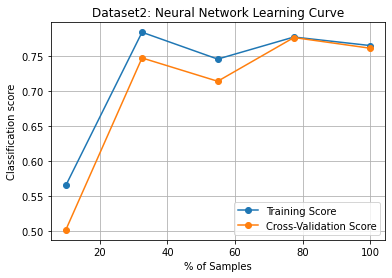

In [647]:
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes,train_scores, test_scores = learning_curve(clf_NN_best, X_train,
                                           y_train,cv=cv,n_jobs=-1,train_sizes=train_sizes)
train_sizes=(train_sizes/train_sizes[-1])*100
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.grid()
plt.title('Dataset2: Neural Network Learning Curve')
plt.xlabel('% of Samples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.show()

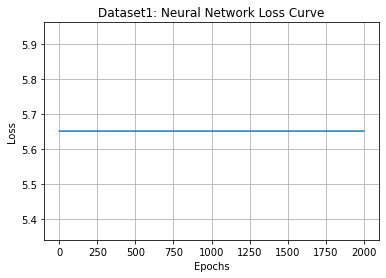

In [648]:
# Loss curve
# https://niruhan.medium.com/drawing-loss-curves-for-deep-neural-network-training-in-pytorch-ac617b24c388
num_epochs = 2000
clf_NN_best_new= MLPClassifier(solver='adam', activation='relu',alpha=best_alpha,
                    hidden_layer_sizes=best_hidden_layers,learning_rate_init=0.001, random_state=7)
loss_epochs = np.empty(num_epochs)
epochs =  np.arange(num_epochs) + 1
for epoch in range(num_epochs):
    clf_NN_best_new.fit(X_train, y_train)
    loss_epochs[epoch] = clf_NN_best_new.loss_

plt.figure()
plt.plot(epochs, loss_epochs)
plt.grid()
plt.title('Dataset2: Neural Network Loss Curve')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.show()
    

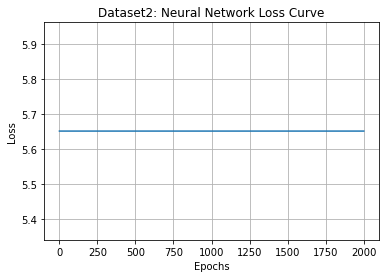

In [649]:
plt.figure()
plt.plot(epochs, loss_epochs)
plt.grid()
plt.title('Dataset2: Neural Network Loss Curve')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.show()
    

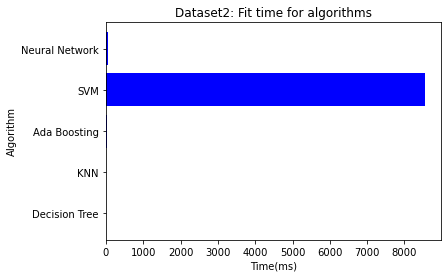

In [656]:
plt.barh(algotrithms, fit_time*1000, color='blue')
plt.xlabel("Time(ms)")
plt.ylabel("Algorithm")
plt.title("Dataset2: Fit time for algorithms")
plt.show()

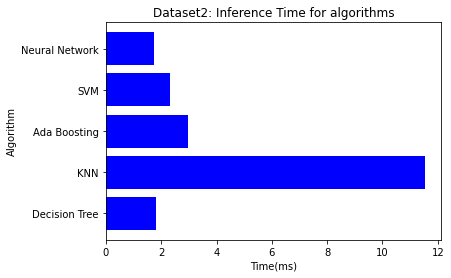

In [559]:
plt.barh(algotrithms, inference_time*1000, color='blue')
plt.xlabel("Time(ms)")
plt.ylabel("Algorithm")
plt.title("Dataset2: Inference Time for algorithms")
plt.show()

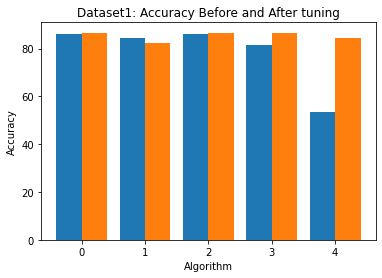

In [560]:
X_axis = np.arange(len(algotrithms))
plt.bar(X_axis - 0.2, accuracy_before, 0.4, label = 'Before Tuning')
plt.bar(X_axis + 0.2, accuracy_after, 0.4, label = 'After tuning')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Dataset1: Accuracy Before and After tuning")
plt.show()


In [609]:
#print(accuracy_before)
#print(accuracy_after)